# Métricas de evaluación de algoritmos de Clasificación
![!\[https://www.google.com/url?sa=i&url=https%3A%2F%2Fdatascientest.com%2Fes%2Fmatriz-de-confusion&psig=AOvVaw2JeB3Sa3M7c9UF1UZjBUtf&ust=1729020503093000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCPCG6bnNjokDFQAAAAAdAAAAABAE\](https://db0dce98.rocketcdn.me/es/files/2024/01/Sans-titre-3_Plan-de-travail-1-768x446-1.png)](https://www.juanbarrios.com/wp-content/uploads/2019/07/Captura-1.png)

In [5]:
#Cargar el dataset de Banknote Authentication
import pandas as pd
nombres = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', names=nombres)
data.head()


Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [12]:
#Breve análisis
data.describe()


,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [11]:
#Como las características tienen distinta media y desviación estándar, vamos a normalizar
from sklearn.preprocessing import StandardScaler

X = data.drop('class', axis=1)   #Matriz de entrada
y = data['class']   #Vector de salida

scaler = StandardScaler()
X_norm = scaler.fit_transform(X) #ndarray - numpy

X_norm_pd = pd.DataFrame(X_norm, columns=[X.columns]) #dataframe - pandas
X_norm_pd.describe().round(3)

,variance,skewness,curtosis,entropy
count,1372.000,1372.000,1372.000,1372.000
mean,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000
min,-2.631,-2.675,-1.551,-3.503
25%,-0.777,-0.619,-0.690,-0.582
50%,0.022,0.068,-0.181,0.288
75%,0.840,0.834,0.414,0.755
max,2.249,1.880,3.837,1.734


In [15]:
from sklearn.model_selection import train_test_split

#Conjunto de entrenamiento/validación
xtrain, xtest, ytrain, ytest = train_test_split(X_norm,y, test_size=0.3, random_state=42)

In [16]:
#Modelo
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=5, random_state=42)

#Entrenar el modelo
modelo.fit(xtrain,ytrain)

#Validación
ypred = modelo.predict(xtest)

In [18]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix

#Comprobación de las clases
print(modelo.classes_)
mat = confusion_matrix(ytest, ypred)
print("Matriz de confusión: \n", mat)

[0 1]
Matriz de confusión: 
 [[229   0]
 [ 15 168]]


![alt text](https://upload.wikimedia.org/wikipedia/commons/9/9c/Matriz_confusion.png)

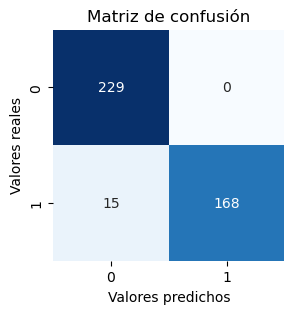

In [21]:
#Matriz bonita
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,3))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.title("Matriz de confusión")
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.show()

In [23]:
vp, fn, fp, vn = mat.ravel()

## Exactitud(Depende del balance de las clases)

In [25]:
exactitud = (vp+vn)/(vp+vn+fp+fn)
print(f"La exactitud calculada según MC es: {exactitud:.2f}")

from sklearn.metrics import accuracy_score
print("La exactitud según librería es: ", accuracy_score(ytest, ypred).round(2))


La exactitud calculada según MC es: 0.96
La exactitud según librería es:  0.96


Notas Marcelo
nota<5 = reprueba

1er 9 8 8 10     (Aprueba) 
2do 9 9 4 10     (Aprueba)
3ro 7 6 8 3       (Reprueba)
4to 10 10 10 7    (Aprueba)

2 clases
registros: 100
Aprueba: 80 - Aprende mejor
Reprueba:20 - Aprende menos

test =20% (20 muestras)
20 pertenecen a Aprueba ---> Acierta más
20 pertenecen a Reprueba ---> Falla más

In [28]:
#Comprobar el balance de las clases
print("¿Qué clases existen en el dataset?\n", data['class'].unique())
#Registros por clase
print("Registros por clase: \n", data['class'].value_counts())

¿Qué clases existen en el dataset?
 [0 1]
Registros por clase: 
 class
0    762
1    610
Name: count, dtype: int64


## Precisión (No depende del balance)

In [29]:
from sklearn.metrics import precision_score

print("La precisión es :", precision_score(ytest, ypred).round(3))


La precisión es : 1.0


In [32]:
from sklearn.metrics import classification_report

print("Resumen de métricas del algoritmo: \n", classification_report(ytest, ypred))

Resumen de métricas del algoritmo: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       229
           1       1.00      0.92      0.96       183

    accuracy                           0.96       412
   macro avg       0.97      0.96      0.96       412
weighted avg       0.97      0.96      0.96       412



In [38]:
valor = ytest.count() #Conjunto de validación
print(valor)

print("Registros por clase: \n", data['class'].value_counts())


412
Registros por clase: 
 class
0    762
1    610
Name: count, dtype: int64
